# Task 1 and 2

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("mcdonalds.csv")
data.shape

(1525, 11)

In [3]:
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,Unnamed: 10
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\nOrderProblem\nFilthy,1.0\n0.6667\n0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be...",NaN
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. ŒæI came in at 9:30...,NaN
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\nOrderProblem,1.0\n1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave...",NaN
3,679455656,False,finalized,3,2/21/15 0:27,na,0.6667,Atlanta,NaN,I see I'm not the only one giving 1 star. Only...,NaN
4,679455657,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,"Well, it's McDonald's, so you know what the fo...",NaN


In [4]:
data.isnull().tail()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,Unnamed: 10
1520,False,False,False,False,False,False,False,False,True,False,True
1521,False,False,False,False,False,False,False,False,True,False,True
1522,False,False,False,False,False,False,False,False,True,False,True
1523,False,False,False,False,False,False,False,False,True,False,True
1524,False,False,False,False,False,False,False,False,True,False,True


In [5]:
# How many null values column wise
data.isnull().sum()

_unit_id                           0
_golden                            0
_unit_state                        0
_trusted_judgments                 0
_last_judgment_at                  0
policies_violated                 54
policies_violated:confidence      54
city                              87
policies_violated_gold          1525
review                             0
Unnamed: 10                     1525
dtype: int64

* When we used sum function. it convert True = 1 and false = 0
* and count so only sum menas true count in above function

In [6]:
data.shape

(1525, 11)

In [7]:
data["policies_violated"].dropna(how="any").shape

(1471,)

In [8]:
data.dropna(subset=["policies_violated"], how = "any", inplace=True)

In [9]:
data.shape

(1471, 11)

# Task 3

In [10]:
data.policies_violated.str.contains("RudeService").head(5)

0     True
1     True
2    False
3    False
4     True
Name: policies_violated, dtype: bool

In [11]:
data["rude"] = data.policies_violated.str.contains("RudeService").astype(int)

In [12]:
data.shape

(1471, 12)

In [13]:
data.head(4)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,Unnamed: 10,rude
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\nOrderProblem\nFilthy,1.0\n0.6667\n0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be...",NaN,1
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. ŒæI came in at 9:30...,NaN,1
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\nOrderProblem,1.0\n1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave...",NaN,0
3,679455656,False,finalized,3,2/21/15 0:27,na,0.6667,Atlanta,NaN,I see I'm not the only one giving 1 star. Only...,NaN,0


In [14]:
# 503 column with rude service and 968 not rude service.
data.rude.value_counts()

0    968
1    503
Name: rude, dtype: int64

# Task 4

In [15]:
# Feature Engineering
X = data.review
y = data.rude

In [16]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print(X_train.shape)
print(y_test.shape)

(1103,)
(368,)


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)

In [18]:
X_test_dtm = vect.transform(X_test)

In [19]:
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(1103, 7300)
(368, 7300)


# Task 5

In [20]:
## Navie bayes module
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
nb = MultinomialNB()
nb.fit(X_train_dtm,y_train)
y_pred_class = nb.predict(X_test_dtm)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_class))

Accuracy 0.798913043478


In [21]:
## Accuracy is not important for us 
metrics.confusion_matrix(y_test,y_pred_class)

array([[207,  26],
       [ 48,  87]])

* False Positive = 26 incorrectly classifies as 1 rudeservice
* False Negative = 48 inocorrectly classifies as other service but actually rude service.
* True Positve = correctly classifies as rudeservice 87
* TN = correctly classified as other service 207

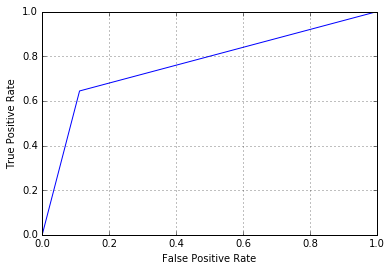

In [22]:
## Roc curve 
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred_class)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)

In [23]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:,1]
y_pred_prob

array([  9.99234643e-01,   2.59242971e-01,   8.57868677e-01,
         2.67695702e-06,   2.68548521e-01,   9.97469782e-01,
         7.40699844e-04,   1.11406133e-09,   1.91914636e-01,
         4.11011564e-01,   9.97466984e-01,   5.38284222e-02,
         6.80854939e-07,   8.34493700e-01,   2.15804856e-01,
         9.95641179e-01,   1.19139453e-04,   1.00000000e+00,
         2.95609981e-03,   8.56160253e-02,   1.07358615e-07,
         1.24737099e-03,   3.17424163e-03,   9.99811373e-01,
         2.97503091e-01,   1.69157013e-07,   5.73190648e-01,
         1.80537581e-01,   9.23675492e-02,   7.26950593e-01,
         7.31090780e-01,   9.99998319e-01,   9.99999992e-01,
         1.53328396e-06,   9.99999991e-01,   1.84177211e-02,
         3.56210035e-01,   5.82027503e-01,   5.44354319e-04,
         2.65523485e-01,   1.27716883e-03,   9.76737932e-04,
         7.18630183e-01,   3.16802348e-02,   1.07181170e-09,
         5.65547636e-06,   4.53633177e-03,   2.72992981e-04,
         6.94722415e-02,

# we have to mention here y_pred _prob not y_pred_class we are measuring the probability not class

In [24]:
print("AUC Accuracy:", metrics.roc_auc_score(y_test,y_pred_prob))

AUC Accuracy: 0.841964711493


In [25]:
# Lets see the same module with logistice regreesion.
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_dtm,y_train)
y_pred_class = logreg.predict(X_test_dtm)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_class))

Accuracy: 0.766304347826


In [26]:
y_pred_prob = logreg.predict_proba(X_test_dtm)[:,1]
y_pred_prob.shape

(368,)

In [27]:
print("Accuracy:", metrics.roc_auc_score(y_test,y_pred_prob))

Accuracy: 0.823398505802


* naive bayes module getting good accuracy as compared to Logistic regression.

# Task 6

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    print("Features: ", X_train_dtm.shape[1])
    nb = MultinomialNB()
    nb.fit(X_train_dtm,y_train)
    y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
    print("AUC:", metrics.roc_auc_score(y_test,y_pred_prob))
    
    
    

In [29]:
vect = CountVectorizer()
tokenize_test(vect)

Features:  7300
AUC: 0.841964711493


In [30]:
# let me see the Default parameters
vect = CountVectorizer(lowercase=False)
tokenize_test(vect)

Features:  8742
AUC: 0.840375139088


In [31]:
# ngrame
vect = CountVectorizer(ngram_range=(1,2))
tokenize_test(vect)

Features:  57936
AUC: 0.818375457002


In [32]:
# stop words
vect = CountVectorizer(stop_words="english")
tokenize_test(vect)

Features:  7021
AUC: 0.853266571292


* our accuracy increased almost by 1 percent

In [33]:
vect = CountVectorizer(max_df=0.5)
tokenize_test(vect)

Features:  7291
AUC: 0.844794150374


* max df is also helpful to increase the accuarcy of our module

In [34]:
vect = CountVectorizer(max_features=1000)
tokenize_test(vect)

Features:  1000
AUC: 0.830074709903


In [35]:
vect = CountVectorizer(min_df=2)
tokenize_test(vect)

Features:  3500
AUC: 0.844221904308


In [36]:
vect = CountVectorizer(stop_words="english", max_df=0.5, min_df=2)
tokenize_test(vect)

Features:  3241
AUC: 0.854522333492


* Our final AUC accuracy is 85 percent

# Task 7

In [37]:
data["review_city"] = data.review.str.cat(data.city, sep= " ", na_rep= "na")

In [38]:
data.loc[0, "review_city"]

"I'm not a huge mcds lover, but I've been to better ones. This is by far the worst one I've ever been too! It's filthy inside and if you get drive through they completely screw up your order every time! The staff is terribly unfriendly and nobody seems to care. Atlanta"

In [41]:
X = data.review_city
y = data.rude

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
 

In [43]:
vect = CountVectorizer(stop_words="english", max_df=0.5, min_df=2)
tokenize_test(vect)

Features:  3246
AUC: 0.854252106183


In [44]:
# City was not helpful to us our accuaracy has been decreased 

# Task 8

In [55]:
data["confidence_list"] = data["policies_violated:confidence"].str.split()
data.head(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,Unnamed: 10,rude,review_city,confidence_list
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\nOrderProblem\nFilthy,1.0\n0.6667\n0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be...",NaN,1,"I'm not a huge mcds lover, but I've been to be...","[1.0, 0.6667, 0.6667]"
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. ŒæI came in at 9:30...,NaN,1,Terrible customer service. ŒæI came in at 9:30...,[1]


In [51]:
import numpy as np
def mean_list(conf_list):
    conf_array = np.array(conf_list, dtype = float)
    return np.mean(conf_array)
    

In [58]:
data["confidence_mean"] = data.confidence_list.apply(mean_list)

In [63]:
data.confidence_mean.head(5)

0    0.7778
1    1.0000
2    1.0000
3    0.6667
4    1.0000
Name: confidence_mean, dtype: float64

In [69]:
X_train = X_train[data["confidence_mean"] >= 0.75]
y_train = y_train[data["confidence_mean"] >= 0.75]

In [70]:
print(X_train.shape)
print(y_train.shape)

(799,)
(799,)


In [71]:
vect = CountVectorizer(stop_words="english", max_df=0.5, min_df=2)
tokenize_test(vect)

Features:  2548
AUC: 0.853346049913


In [72]:
# This method doesnot help either

# Task 9

In [74]:
X = data.review_city
y = data.rude

In [75]:
vect = CountVectorizer(stop_words='english', max_df=0.3, min_df=4)

In [76]:
x_dtm = vect.fit_transform(X)
x_dtm.shape

(1471, 2104)

In [78]:
new_data = pd.read_csv("mcdonalds_new.csv")
new_data.head()

,city,review
0,Las Vegas,Went through the drive through and ordered a #...
1,Chicago,Phenomenal experience. Efficient and friendly ...
2,Los Angeles,Ghetto lady helped me at the drive thru. Very ...
3,New York,Close to my workplace. It was well manged befo...
4,Portland,I've made at least 3 visits to this particular...


In [83]:
pd.set_option('display.max_colwidth', 1000)

In [85]:
new_data["review_city"] = new_data.review.str.cat(new_data.city, sep= " ", na_rep= "na")
new_data.review_city.head(2)

0    Went through the drive through and ordered a #10 (cripsy sweet chili chicken wrap) without fries- the lady couldn't understand that I did not want fries and charged me for them anyways. I got the wrong order- a chicken sandwich and a large fries- my boyfriend took it back inside to get the correct order. The gentleman that ordered the chicken sandwich was standing there as well and she took the bag from my bf- glanced at the insides and handed it to the man without even offering to replace. I mean with all the scares about viruses going around... ugh DISGUSTING SERVICE. Then when she gave him the correct order my wrap not only had the sweet chili sauce on it, but the nasty (just not my first choice) ranch dressing on it!!!! I mean seriously... how lazy can you get!!!! I worked at McDonalds in Texas when I was 17 for about 8 months and I guess I was spoiled with good management. This was absolutely ridiculous. I was beyond disappointed. Las Vegas
1                                  

In [87]:
new_dtm = vect.transform(new_data.review_city)
new_dtm.shape

(10, 2104)

In [89]:
nb = MultinomialNB()
nb.fit(x_dtm,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [93]:
new_pred_prob = nb.predict_proba(new_dtm)[:,1]
new_pred_prob.shape

(10,)

In [97]:
pd.DataFrame({"comments": new_data.review_city, "Rude_prob": new_pred_prob }).sort_values("Rude_prob", ascending=False)

,Rude_prob,comments
7,0.999992,My friend and I stopped in to get a late night snack and we were refused service. The store claimed to be 24 hours and the manager was standing right there doing paper work but would not help us. The cashier was only concerned with doing things for the drive thru and said that the manager said he wasn't allowed to help us. We thought it was a joke at first but when realized it wasn't we said goodbye and they just let us leave. I work in a restaurant and this is by far the worst service I have ever seen. I know it was late and maybe they didn't want to be there but it was completely ridiculous. I think the manager should be fired. Dallas
2,0.957038,Ghetto lady helped me at the drive thru. Very rude and disrespectful to the co workers. Never coming back. Yuck! Los Angeles
4,0.399575,"I've made at least 3 visits to this particular location just because it's right next to my office building.. and all my experience have been consistently bad. There are a few helpers taking your orders throughout the drive-thru route and they are the worst. They rush you in placing an order and gets impatient once the order gets a tad bit complicated. Don't even bother changing your mind oh NO! They will glare at you and snap at you if you want to change something. I understand its FAST food, but I want my order placed right. Not going back if I can help it. Portland"
0,0.335338,"Went through the drive through and ordered a #10 (cripsy sweet chili chicken wrap) without fries- the lady couldn't understand that I did not want fries and charged me for them anyways. I got the wrong order- a chicken sandwich and a large fries- my boyfriend took it back inside to get the correct order. The gentleman that ordered the chicken sandwich was standing there as well and she took the bag from my bf- glanced at the insides and handed it to the man without even offering to replace. I mean with all the scares about viruses going around... ugh DISGUSTING SERVICE. Then when she gave him the correct order my wrap not only had the sweet chili sauce on it, but the nasty (just not my first choice) ranch dressing on it!!!! I mean seriously... how lazy can you get!!!! I worked at McDonalds in Texas when I was 17 for about 8 months and I guess I was spoiled with good management. This was absolutely ridiculous. I was beyond disappointed. Las Vegas"
6,0.271384,"This specific McDonald's is the bar I hold all other fast food joints to now. Been working in this area for 3 years now and gone to this location many times for drive-through pickup. Service is always fast, food comes out right, and the staff is extremely warm and polite. Atlanta"
8,0.092585,"Friendly people but completely unable to deliver what was ordered at the drive through. Out of my last 6 orders they got it right 3 times. Incidentally, the billing was always correct - they just could not read the order and deliver. Very frustrating! Cleveland"
5,0.059218,"Why did I revisited this McDonald's again. I needed to use the restroom facilities and the women's bathroom didn't have soap, the floor was wet, the bathroom stink, and the toilets were nasty. This McDonald's is very nasty. Houston"
3,0.039030,"Close to my workplace. It was well manged before. Now it's OK. The parking can be tight sometimes. Like all McDonald's, prices are getting expensive. New York"
9,0.022643,"Having visited many McDonald's over the years, I have to say that this one is the most efficient one ever! Even though it is still fast food, the service at the drive-thru is the best. They rarely make a mistake and I never see anyone parked in the drive-thru slots where they bring food out because they don't have it ready. So, if you like McDonald's fast food, it doesn't get any better than this. na"
1,0.008151,"Phenomenal experience. Efficient and friendly staff. Clean restrooms, good, fast service and bilingual staff. One of the best restaurants in the chain. Chicago"


# Rude Probability Dashboard.